In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-06-20 00:38:53--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  4.99MB/s    in 51s     

2020-06-20 00:39:45 (6.04 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [3]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/rockpaperscissors/'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

os.mkdir(train_dir)
os.mkdir(validation_dir)

In [4]:
train_rock = os.path.join(train_dir, 'rock')
train_paper = os.path.join(train_dir, 'paper')
train_scissors = os.path.join(train_dir, 'scissors')
val_rock = os.path.join(validation_dir, 'rock')
val_paper = os.path.join(validation_dir, 'paper')
val_scissors = os.path.join(validation_dir, 'scissors')

#membuat folder train
if not os.path.isdir(train_rock):
  os.mkdir(train_rock)
if not os.path.isdir(train_paper):
  os.mkdir(train_paper)
if not os.path.isdir(train_scissors):
  os.mkdir(train_scissors)

#membuat folder validation
if not os.path.isdir(val_rock):
  os.mkdir(val_rock)
if not os.path.isdir(val_paper):
  os.mkdir(val_paper)
if not os.path.isdir(val_scissors):
  os.mkdir(val_scissors)


In [5]:
print('Isi train_dir', os.listdir(train_dir))
print('Isi validation_dir', os.listdir(validation_dir))

Isi train_dir ['rock', 'paper', 'scissors']
Isi validation_dir ['rock', 'paper', 'scissors']


In [6]:
rock_dir = os.path.join(base_dir, 'rock')
scissors_dir = os.path.join(base_dir, 'scissors')
paper_dir = os.path.join(base_dir, 'paper')

from sklearn.model_selection import train_test_split
#memecah data menjadi train dan validation
train_rock_dir,val_rock_dir = train_test_split(os.listdir(rock_dir), test_size=0.2)
train_paper_dir,val_paper_dir = train_test_split(os.listdir(paper_dir), test_size=0.2)
train_scissors_dir,val_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size=0.2)


In [7]:
import shutil

#memindahkan data train ke train_dir
for i in train_rock_dir:
  shutil.move(os.path.join(rock_dir, i), os.path.join(train_rock, i))
for i in train_paper_dir:
  shutil.move(os.path.join(paper_dir, i), os.path.join(train_paper, i))
for i in train_scissors_dir:
  shutil.move(os.path.join(scissors_dir, i), os.path.join(train_scissors, i))

#memindahkan data validation ke folder validation_dir
for i in val_rock_dir:
  shutil.move(os.path.join(rock_dir, i), os.path.join(val_rock, i))
for i in val_paper_dir:
  shutil.move(os.path.join(paper_dir, i), os.path.join(val_paper, i))
for i in val_scissors_dir:
  shutil.move(os.path.join(scissors_dir, i), os.path.join(val_scissors, i))


In [8]:
#banyak file train
print('total data train_rock:', len(os.listdir(train_rock)))
print('total data train_paper:', len(os.listdir(train_paper)))
print('total data train_scissors:', len(os.listdir(train_scissors)))

#banyak file validation
print('total data val_rock:', len(os.listdir(val_rock)))
print('total data val_paper:', len(os.listdir(val_paper)))
print('total data val_scissors:', len(os.listdir(val_scissors)))

total data train_rock: 580
total data train_paper: 569
total data train_scissors: 600
total data val_rock: 146
total data val_paper: 143
total data val_scissors: 150


In [9]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range=0.2,
                    fill_mode='nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range=0.2,
                    fill_mode='nearest')

In [14]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=20,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=20,
        class_mode='categorical')

Found 1749 images belonging to 3 classes.
Found 439 images belonging to 3 classes.


In [15]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [16]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [17]:
history = model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=20,
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/20
25/25 - 4s - loss: 1.1072 - accuracy: 0.3988 - val_loss: 1.0645 - val_accuracy: 0.4300
Epoch 2/20
25/25 - 4s - loss: 0.8913 - accuracy: 0.5720 - val_loss: 0.3835 - val_accuracy: 0.8500
Epoch 3/20
25/25 - 4s - loss: 0.4668 - accuracy: 0.8280 - val_loss: 0.3611 - val_accuracy: 0.9000
Epoch 4/20
25/25 - 4s - loss: 0.3620 - accuracy: 0.8660 - val_loss: 0.2887 - val_accuracy: 0.9200
Epoch 5/20
25/25 - 4s - loss: 0.2886 - accuracy: 0.8980 - val_loss: 0.1929 - val_accuracy: 0.9000
Epoch 6/20
25/25 - 4s - loss: 0.2468 - accuracy: 0.9180 - val_loss: 0.2254 - val_accuracy: 0.9100
Epoch 7/20
25/25 - 4s - loss: 0.2675 - accuracy: 0.9160 - val_loss: 0.2904 - val_accuracy: 0.9200
Epoch 8/20
25/25 - 4s - loss: 0.2446 - accuracy: 0.9320 - val_loss: 0.2083 - val_accuracy: 0.9500
Epoch 9/20
25/25 - 4s - loss: 0.1962 - accuracy: 0.9440 - val_loss: 0.1424 - val_accuracy: 0.9500
Epoch 10/20
25/25 - 4s - loss: 0.1837 - accuracy: 0.9305 - val_loss: 0.2043 - val_accuracy: 0.9400
Epoch 11/20
25/25 -

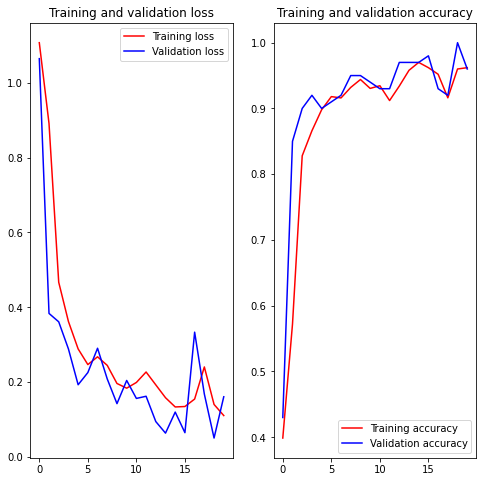

In [18]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=1)

plt.subplot(1, 2, 2)
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=4)
plt.show()

Saving batu.png to batu.png
batu.png
rock


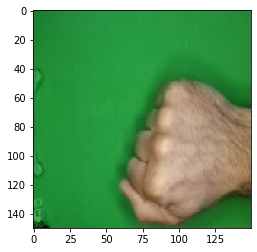

In [20]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  if classes[0,0] != 0:
    print('paper')
  elif classes[0,1] != 0:
    print('rock')
  else:
    print('scissors')